Table of Contents:  
1. Import libraries and data.
2. Visualizations.
3. Sales findings for Instacart senior stakeholders.
4. Distribution of orders among customers in terms of loyalty - insights for the marketing team.
5. Check whether there's a difference in expenditure depending on the hour of the day.
6. Exploratory analysis of customer demographics.
7. Check whether there's a connection between age and spending power (income).
8. Export the dataframe.

1. Import libraries and data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Define path
path = r'/Users/samlisik/Documents/Instacart Basket Analysis'

In [3]:
# Import the most recent combined dataset
orders_products_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

In [4]:
# Check the structure
orders_products_all.shape

(32436241, 26)

In [5]:
# Quick preview
orders_products_all.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,...,busiest_day,busiest_days_v2,busiest_period_of_day,gender,state,age,date_joined,n_dependants,family_status,income
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Regularly busy,Regularly busy,Average orders,Female,Alabama,31,2019-02-17,3,married,40423
1,2539329,1,prior,1,2,8,NaN,14084,2,0,...,Regularly busy,Regularly busy,Average orders,Female,Alabama,31,2019-02-17,3,married,40423
2,2539329,1,prior,1,2,8,NaN,12427,3,0,...,Regularly busy,Regularly busy,Average orders,Female,Alabama,31,2019-02-17,3,married,40423
3,2539329,1,prior,1,2,8,NaN,26088,4,0,...,Regularly busy,Regularly busy,Average orders,Female,Alabama,31,2019-02-17,3,married,40423
4,2539329,1,prior,1,2,8,NaN,26405,5,0,...,Regularly busy,Regularly busy,Average orders,Female,Alabama,31,2019-02-17,3,married,40423


2. Visualizations

In [9]:
# Check all the columns in the dataframe
orders_products_all.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_last_order', 'product_id',
       'add_to_cart_order', 'reordered', '_merge', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days_v2', 'busiest_period_of_day', 'gender', 'state', 'age',
       'date_joined', 'n_dependants', 'family_status', 'income'],
      dtype='object')

In [10]:
# Create a max_order column per user
orders_products_all['max_order'] = orders_products_all.groupby('user_id')['order_number'].transform('max')

In [11]:
# Create loyalty_flag based on max_order
orders_products_all['loyalty_flag'] = 'Regular customer'  # default
orders_products_all.loc[orders_products_all['max_order'] > 40, 'loyalty_flag'] = 'Loyal customer'
orders_products_all.loc[orders_products_all['max_order'] < 10, 'loyalty_flag'] = 'New customer'

In [12]:
# Quick check
orders_products_all['loyalty_flag'].value_counts()

loyalty_flag
Regular customer    16665980
Loyal customer      10294330
New customer         5475931
Name: count, dtype: int64

1. Bar chart - loyalty flag distribution

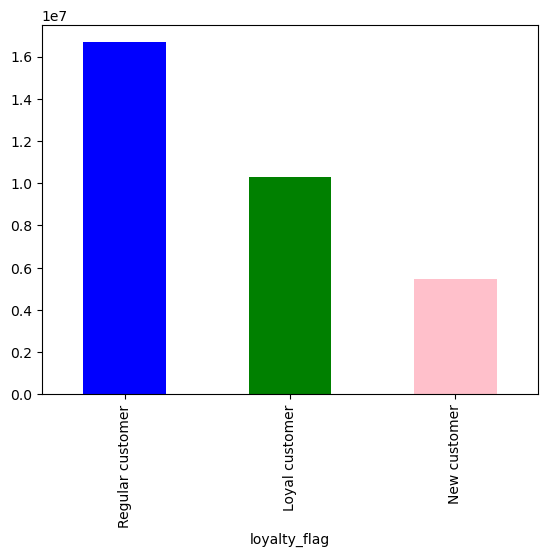

In [13]:
# Bar chart: loyalty flag distribution
bar = orders_products_all['loyalty_flag'].value_counts().plot.bar(
    color=['blue', 'green', 'pink'])

In [16]:
# Export the loyalty_flag bar chart
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_flag.png'))

2. Histogram of product prices

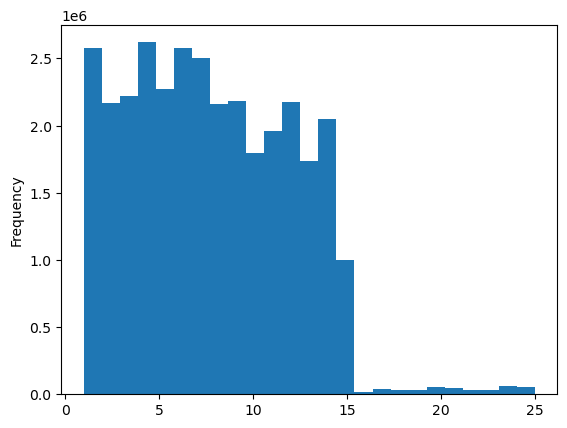

In [14]:
# Create histogram of product prices
hist = orders_products_all['prices'].plot.hist(bins=25)

In [15]:
# Export the histogram
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_prices.png'))

3. Line chart - average prices per orders_day_of_week

In [17]:
# Set seed for reproducibility
np.random.seed(4)

In [18]:
# Create a random 70/30 split
dev = np.random.rand(len(orders_products_all)) <= 0.7

In [19]:
# Use the smaller 30% sample for the line chart
sample = orders_products_all[~dev]

In [20]:
# Reduce the sample to only necessary columns
df_line = sample[['orders_day_of_week', 'prices']]

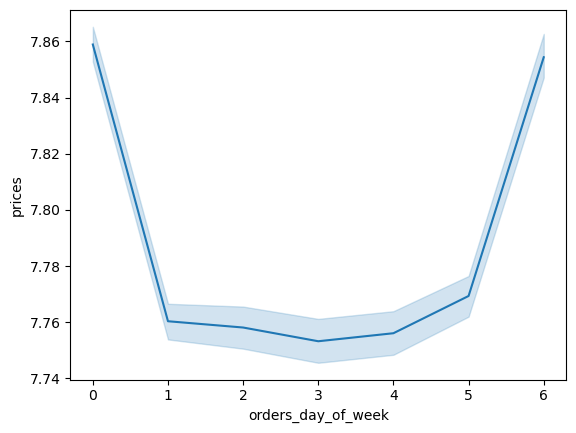

In [22]:
# Create the line chart
line = sns.lineplot(data=df_line, x='orders_day_of_week', y='prices')

In [23]:
# Export the line chart
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_prices_dow_sample.png'))

3. Sales findings for Instacart senior stakeholders

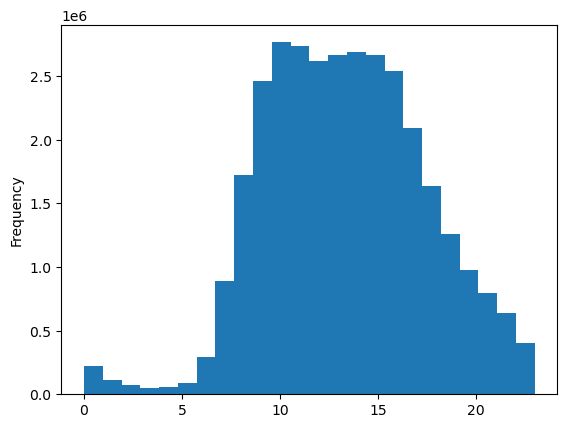

In [24]:
# Create histogram of order_hour_of_day
hist_orders_hour = orders_products_all['order_hour_of_day'].plot.hist(bins=24)

Histogram of Orders by Hour of Day

The histogram shows how order volume varies throughout the day. Peaks indicate the hours when most customers place orders (10:00-15:00). The lowest points reveal hours with minimal activity, such as early morning (5:00am) and late at night (12:00pm). This information can help senior stakeholders identify peak ordering times for promotions or staffing optimization.

In [25]:
# Export the histogram
hist_orders_hour.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_orders_hour.png'))

4. Distribution of orders among customers in terms of loyalty - insights for the marketing team

Please refer to the # Bar chart: loyalty flag distribution.

The bar chart shows the distribution of Instacart customers according to their loyalty status. We can see the proportion of Loyal Customers, Regular Customers, and New Customers. This visualization highlights which customer segment is the largest and which is the smallest, helping the marketing team target campaigns more effectively.

From the chart, it appears that the majority of customers are Regular Customers, while New Customers makes up the smallest share. This insight can inform strategies such as promotions for new customers or retention programs for regular customers.

5. Check whether there's a difference in expenditure depending on the hour of the day

In [26]:
# Create a random sample of 30% of the dataframe to avoid memory issues
np.random.seed(4)
sample = np.random.rand(len(orders_products_all)) <= 0.3
df_sample = orders_products_all[sample]

In [27]:
# Limit to relevant columns
df_line = df_sample[['order_hour_of_day', 'prices']]

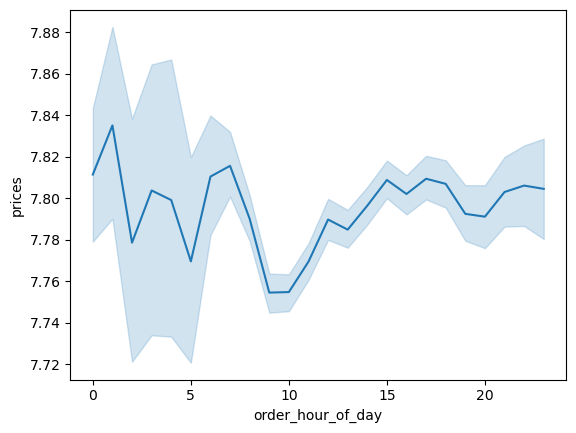

In [28]:
# Create the line chart
line = sns.lineplot(data=df_line, x='order_hour_of_day', y='prices')

In [29]:
# Export the line chart
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_prices_by_hour.png'))

Key insights:

The data suggests a clear pattern in expenditure: average transaction price is highest when orders are placed just after midnight and lowest during the late morning hours. This could be useful for inventory stocking, targeted promotions (e.g., offering lower-priced bundles during the mid-morning slump to boost volume), or understanding the customer segments active at these times.

6. Exploratory analysis of customer demographics

In [30]:
# Create a sample to avoid memory issues
np.random.seed(4)
sample = np.random.rand(len(orders_products_all)) <= 0.3
df_sample = orders_products_all[sample]

In [37]:
# Limit to relevant columns
df_demo = df_sample[['age', 'n_dependants']]

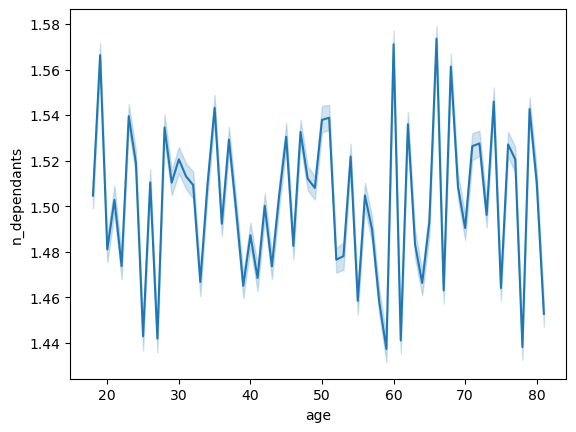

In [38]:
# Create a line chart
line_age_dependants = sns.lineplot(data=df_demo, x='age', y='n_dependants')

In [39]:
# Export the chart
line_age_dependants.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_dependants_by_age.png'))

Key insights:

There is no clear relationship or correlation between a customer's age and their average number of dependants. This suggests that knowing a customer's age does not help us predict or estimate how many dependants they have.

The variation in dependents at any specific age is likely due to the randomness of the sampled data or the small size of the population at that specific age, rather than a genuine trend caused by age itself.

7. Check whether there's a connection between age and spending power (income)

In [40]:
# Create a sample to avoid memory issues
np.random.seed(4)
sample = np.random.rand(len(orders_products_all)) <= 0.3
df_income_sample = orders_products_all[sample]

In [41]:
# Limit to relevant columns
df_income = df_income_sample[['age', 'income']]

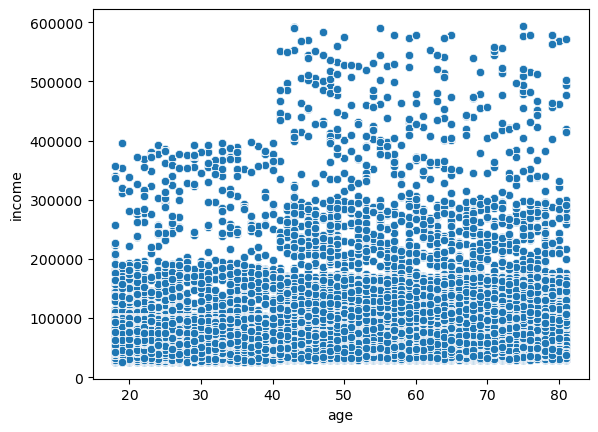

In [42]:
# Create scatterplot
scatter_age_income = sns.scatterplot(data=df_income, x='age', y='income')

In [43]:
# Export the scatterplot
scatter_age_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatter_income_by_age.png'))

Key insights:

Age is not a direct predictor of income for the majority of the customers (the dense cluster below $200.000). However, age acts as an enabler for the highest income brackets. Customers below 40 are rarely found in the highest income brackets, while those 40 and older are the only ones who consistently reach and exceed the top income levels.

8. Export the dataframe

In [44]:
# Export the dataframe
orders_products_all.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))